<a href="https://colab.research.google.com/github/k-anushka14/image_recognition/blob/main/Image_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
pip install -q kaggle

In [8]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anushkakawalkar","key":"74732abf4d0ebae7185abeeb6e918564"}'}

In [9]:
!mkdir -/.kaggle
!cp kaggle.json ~/.kaggle/


mkdir: invalid option -- '/'
Try 'mkdir --help' for more information.
cp: cannot create regular file '/root/.kaggle/': Not a directory


In [10]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/


In [11]:
!chmod 600 ~/.kaggle/kaggle.json

In [12]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("hojjatk/mnist-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/mnist-dataset


In [13]:
import tensorflow as tf
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()
print(f"Train shape: {x_train.shape}, Test shape: {x_test.shape}")

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Train shape: (60000, 28, 28), Test shape: (10000, 28, 28)


In [14]:
x_train=x_train/255.0
x_test=x_test/255.0
x_train=x_train.reshape(-1,28,28,1)
x_test=x_test.reshape(-1,28,28,1)
print(f"Train reshaped: {x_train.shape}")

Train reshaped: (60000, 28, 28, 1)


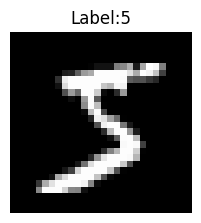

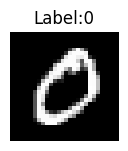

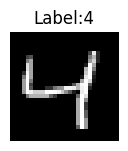

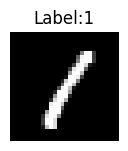

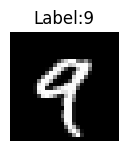

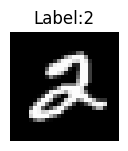

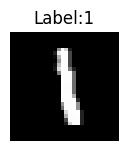

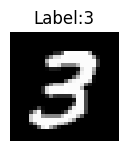

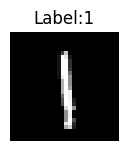

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.imshow(x_train[i].reshape(28,28), cmap='gray')
  plt.title(f"Label:{y_train[i]}")
  plt.axis('off')
  plt.show()



In [16]:
(x_train_c10,y_train_c10),(x_test_c10,y_test_c10)=tf.keras.datasets.cifar10.load_data()
x_train_c10=x_train_c10/255.0
x_test_c10=x_test_c10/255.0
print(f"CIFAR-10 train shape:{x_train_c10.shape}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
CIFAR-10 train shape:(50000, 32, 32, 3)


In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history=model.fit(x_train,y_train,epochs=5,batch_size=32,validation_split=0.2)

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 49s 32ms/step - accuracy: 0.8966 - loss: 0.3310 - val_accuracy: 0.9789 - val_loss: 0.0739
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 82s 32ms/step - accuracy: 0.9840 - loss: 0.0503 - val_accuracy: 0.9825 - val_loss: 0.0588
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 45s 30ms/step - accuracy: 0.9896 - loss: 0.0316 - val_accuracy: 0.9856 - val_loss: 0.0506
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 80s 29ms/step - accuracy: 0.9926 - loss: 0.0232 - val_accuracy: 0.9888 - val_loss: 0.0393
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 84s 30ms/step - accuracy: 0.9952 - loss: 0.0146 - val_accuracy: 0.9889 - val_loss: 0.0426


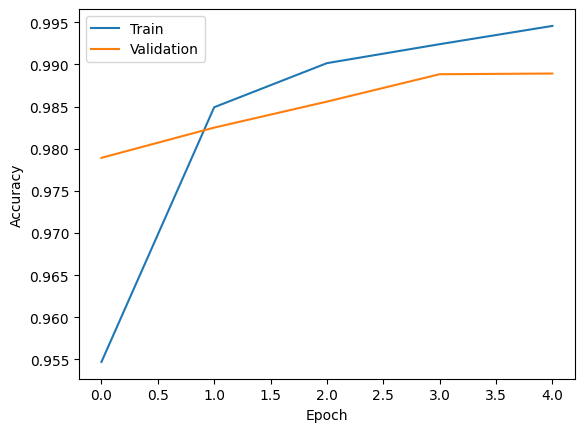

In [19]:
plt.plot(history.history['accuracy'],label='Train')
plt.plot(history.history['val_accuracy'],
         label='Validation')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [20]:
test_loss,test_acc=model.evaluate(x_test,y_test)
print("Test Accuracy:{test_acc:.4f}")
y_pred=model.predict(x_test).argmax(axis=1)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9857 - loss: 0.0442
Test Accuracy:{test_acc:.4f}
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step


In [21]:

from tensorflow.keras.layers import Dropout
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(10,activation='softmax')
])

In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen= ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train_c10)

In [23]:
from tensorflow.keras.layers import BatchNormalization
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    BatchNormalization(),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256,activation='relu'),
    Dropout(0.5),
    Dense(10,activation='softmax')

])
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(datagen.flow(x_train_c10,y_train_c10,batch_size=32),epochs=8,validation_data=(x_test_c10,y_test_c10))

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 125s 78ms/step - accuracy: 0.3407 - loss: 1.7897 - val_accuracy: 0.5016 - val_loss: 1.3808
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 120s 77ms/step - accuracy: 0.5220 - loss: 1.3400 - val_accuracy: 0.5313 - val_loss: 1.3122
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.5799 - loss: 1.1986 - val_accuracy: 0.6436 - val_loss: 1.0350
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 118s 76ms/step - accuracy: 0.6059 - loss: 1.1359 - val_accuracy: 0.6406 - val_loss: 1.0186
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 141s 75ms/step - accuracy: 0.6232 - loss: 1.0807 - val_accuracy: 0.5980 - val_loss: 1.1552
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.6391 - loss: 1.0355 - val_accuracy: 0.6075 - val_loss: 1.1904
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 116s 74ms/step - accuracy: 0.6515 - loss: 0.9991 - val_accuracy: 0.6913 - val_loss: 0.8985
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 119s 76ms/step - accuracy: 0.6591 - lo

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step
              precision    recall  f1-score   support

           0       0.70      0.75      0.72      1000
           1       0.81      0.88      0.85      1000
           2       0.80      0.42      0.55      1000
           3       0.58      0.43      0.49      1000
           4       0.67      0.59      0.63      1000
           5       0.74      0.48      0.58      1000
           6       0.60      0.89      0.71      1000
           7       0.72      0.76      0.74      1000
           8       0.66      0.90      0.77      1000
           9       0.74      0.84      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.70      0.69      0.68     10000
weighted avg       0.70      0.69      0.68     10000



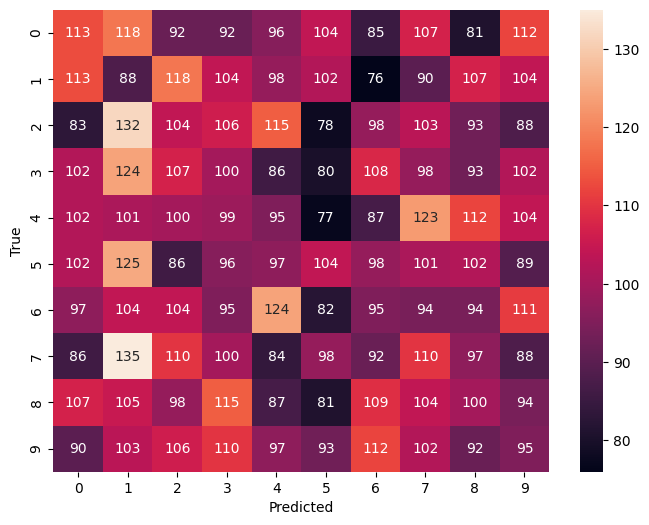

In [24]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred_c10=model.predict(x_test_c10).argmax(axis=1)
cm=confusion_matrix(y_test_c10,y_pred)
print(classification_report(y_test_c10,y_pred_c10))
import seaborn as sms
plt.figure(figsize=(8,6))
sms.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [25]:
!kaggle datasets download -d tongpython/cat-and-dog

Dataset URL: https://www.kaggle.com/datasets/tongpython/cat-and-dog
License(s): CC0-1.0
 98% 214M/218M [00:00<00:00, 552MB/s] 
100% 218M/218M [00:00<00:00, 596MB/s]


In [26]:
import zipfile
with zipfile.ZipFile('/content/cat-and-dog.zip','r') as zip_ref:
  zip_ref.extractall('/content/dogs-vs-cats')

In [27]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen=ImageDataGenerator(rescale=1./255,validation_split=0.2)
train_generator=datagen.flow_from_directory('/content/dogs-vs-cats',target_size=(224,224),
                                            batch_size=32,class_mode='binary',subset='training')
val_generator=datagen.flow_from_directory('/content/dogs-vs-cats',target_size=(224,224),
                                            batch_size=32,class_mode='binary',subset='validation')

Found 8023 images belonging to 2 classes.
Found 2005 images belonging to 2 classes.


In [28]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
base_model=MobileNetV2(weights='imagenet',include_top=False,input_shape=(224,224,3))
base_model.trainable=False
model=Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128,activation='relu'),
    Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=4,validation_data=val_generator)

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 439s 2s/step - accuracy: 0.7866 - loss: 0.5431 - val_accuracy: 0.7985 - val_loss: 0.5087
Epoch 2/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 426s 2s/step - accuracy: 0.7951 - loss: 0.5002 - val_accuracy: 0.7985 - val_loss: 0.5100
Epoch 3/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 432s 2s/step - accuracy: 0.7962 - loss: 0.4903 - val_accuracy: 0.7980 - val_loss: 0.5302
Epoch 4/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 422s 2s/step - accuracy: 0.7976 - loss: 0.4782 - val_accuracy: 0.7960 - val_loss: 0.5349
Epoch 5/5
251/251 ━━━━━━━━━━━━━━━━━━━━ 425s 2s/step - accuracy: 0.8122 - loss: 0.4410 - val_accuracy: 0.7980 - val_loss: 0.5246


In [29]:
base_model.trainable=True
model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),loss='binary_crossentropy',metrics=['accuracy'])
model.fit(train_generator,epochs=3,validation_data=val_generator)

Epoch 1/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 2004s 8s/step - accuracy: 0.7953 - loss: 0.4864 - val_accuracy: 0.7980 - val_loss: 0.5253
Epoch 2/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 1960s 8s/step - accuracy: 0.8001 - loss: 0.4478 - val_accuracy: 0.7980 - val_loss: 0.5291
Epoch 3/3
251/251 ━━━━━━━━━━━━━━━━━━━━ 2007s 8s/step - accuracy: 0.8074 - loss: 0.4209 - val_accuracy: 0.7960 - val_loss: 0.5331


In [31]:
model.save('mobilenet_cats_dogs.h5')
import tensorflow as tf
loaded_model=tf.keras.models.load_model('mobilenet_cats_dogs.h5')

63/63 ━━━━━━━━━━━━━━━━━━━━ 86s 1s/step


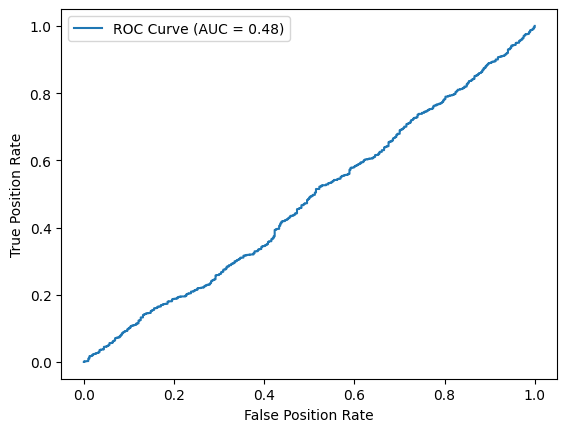

In [32]:
from sklearn.metrics import roc_curve,auc
y_pred_proba=loaded_model.predict(val_generator)
fpr,tpr,_=roc_curve(val_generator.classes,y_pred_proba)
roc_auc=auc(fpr,tpr)
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0.1],[0.1],'k--')
plt.xlabel('False Position Rate')
plt.ylabel('True Position Rate')
plt.legend()
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload e.g. 'mycat.jpg'

from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
import numpy as np

img_path = 'download.jpg'  # Replace with your filename
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)

prediction = loaded_model.predict(img_array)
print("Predicted class:", "Dog" if prediction[0][0] > 0.5 else "Cat")

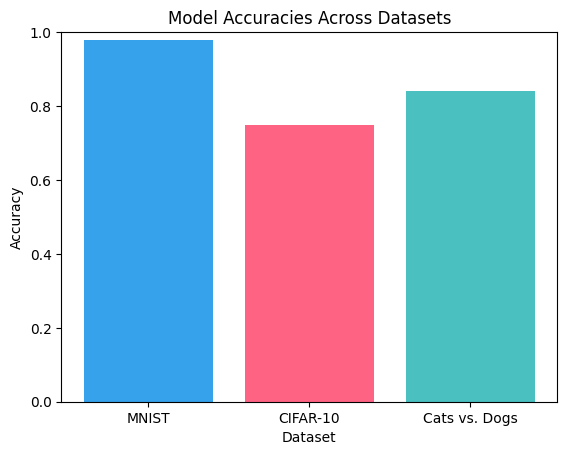

In [33]:
import matplotlib.pyplot as plt
datasets = ['MNIST', 'CIFAR-10', 'Cats vs. Dogs']
accuracies = [0.98, 0.75, 0.84]
plt.bar(datasets, accuracies, color=['#36A2EB', '#FF6384', '#4BC0C0'])
plt.title('Model Accuracies Across Datasets')
plt.xlabel('Dataset')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.show()
